## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import joblib

# Set Seaborn style
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f0f0f0"})

##  Load Backtest Results and Model

In [2]:
# Load backtest results (from Day 4)
backtest_results = pd.read_csv("SMH_Backtest_Results.csv", parse_dates=["Date"])

# Load the trained model (from Day 3)
best_model = joblib.load("best_xgboost_model.pkl")

## Calculate Sharpe Ratio

In [3]:
# Calculate daily returns
daily_returns = backtest_results["Portfolio_Value"].pct_change().dropna()

# Assume annual risk-free rate = 0% (simplified)
risk_free_rate = 0.0
annualized_sharpe_ratio = np.sqrt(252) * (daily_returns.mean() - risk_free_rate) / daily_returns.std()

print(f"Annualized Sharpe Ratio: {annualized_sharpe_ratio:.2f}")

Annualized Sharpe Ratio: 0.11


## Monte Carlo Simulation for Risk Assessment

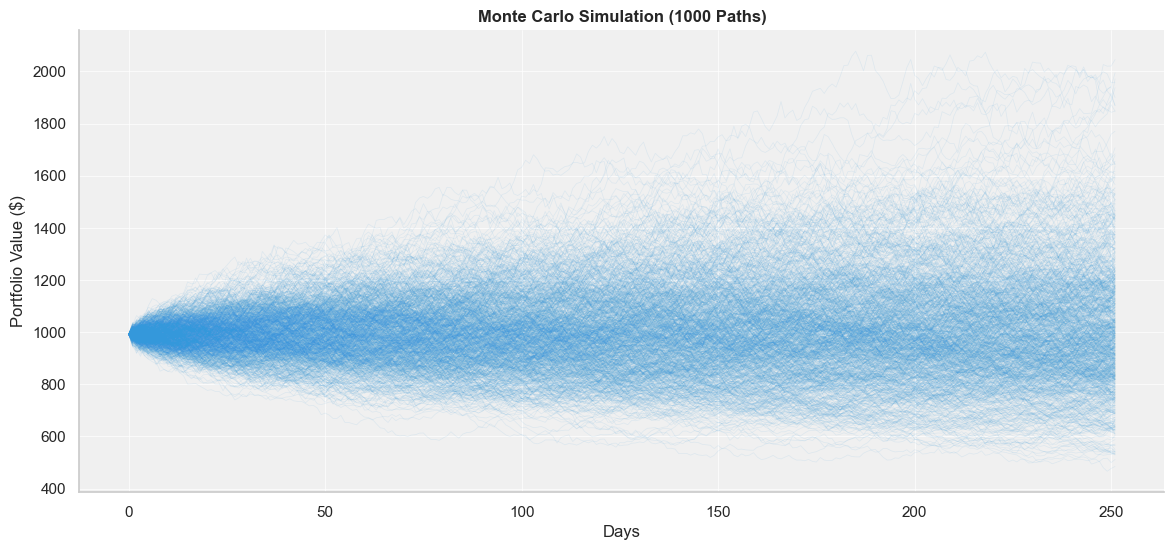

5th Percentile: $660.35
95th Percentile: $1452.47


In [4]:
# Monte Carlo parameters
n_simulations = 1000
n_days = 252  # 1 year
initial_value = backtest_results["Portfolio_Value"].iloc[-1]

# Calculate historical mean and volatility
mu = daily_returns.mean() * 252  # Annualized return
sigma = daily_returns.std() * np.sqrt(252)  # Annualized volatility

# Run simulations
simulations = np.zeros((n_days, n_simulations))
simulations[0] = initial_value

for day in range(1, n_days):
    shocks = np.random.normal(mu/n_days, sigma/np.sqrt(n_days), size=n_simulations)
    simulations[day] = simulations[day-1] * (1 + shocks)

# Plot simulations
plt.figure(figsize=(14, 6))
for i in range(n_simulations):
    plt.plot(simulations[:, i], linewidth=0.5, alpha=0.1, color="#3498db")

plt.title(f"Monte Carlo Simulation ({n_simulations} Paths)", fontsize=12, fontweight="bold")
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.grid(True, color="white", linestyle="-", linewidth=0.5)
plt.gca().set_facecolor("#f0f0f0")
sns.despine()
plt.show()

# Calculate 5th and 95th percentiles
final_values = simulations[-1, :]
print(f"5th Percentile: ${np.percentile(final_values, 5):.2f}")
print(f"95th Percentile: ${np.percentile(final_values, 95):.2f}")

## Maximum Drawdown Analysis

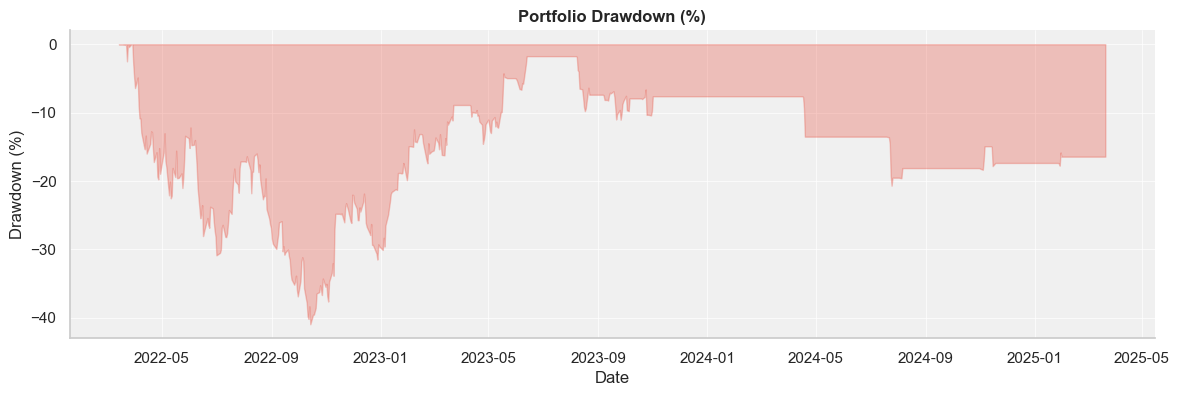

Maximum Drawdown: -40.98%


In [5]:
# Calculate running maximum and drawdown
cumulative_max = backtest_results["Portfolio_Value"].cummax()
drawdown = (backtest_results["Portfolio_Value"] - cumulative_max) / cumulative_max
max_drawdown = drawdown.min() * 100  # In percentage

# Plot drawdown
plt.figure(figsize=(14, 4))
plt.fill_between(backtest_results["Date"], drawdown * 100, color="#e74c3c", alpha=0.3)
plt.title("Portfolio Drawdown (%)", fontsize=12, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.grid(True, color="white", linestyle="-", linewidth=0.5)
plt.gca().set_facecolor("#f0f0f0")
sns.despine()
plt.show()

print(f"Maximum Drawdown: {max_drawdown:.2f}%")

## Generate Whitepaper

In [8]:
# Load backtest results (ensure this file exists from Day 4)
backtest_results = pd.read_csv("SMH_Backtest_Results.csv", parse_dates=["Date"])

# Recalculate Total Return
initial_capital = 1000
final_value = backtest_results["Portfolio_Value"].iloc[-1]
total_return_pct = (final_value / initial_capital - 1) * 100

# Reconstruct trades from backtest results
position_changes = backtest_results["Position"].diff().fillna(0)
buy_dates = backtest_results[position_changes == 1]["Date"].tolist()
sell_dates = backtest_results[position_changes == -1]["Date"].tolist()

# Calculate trade returns
trade_returns = []
for buy_date, sell_date in zip(buy_dates, sell_dates):
    buy_price = df.loc[buy_date, "Close"]
    sell_price = df.loc[sell_date, "Close"]
    trade_return = (sell_price - buy_price) / buy_price
    trade_returns.append(trade_return)

win_rate = np.mean(np.array(trade_returns) > 0) * 100 if trade_returns else 0.0

# Sharpe Ratio (already calculated in Day 5)
daily_returns = backtest_results["Portfolio_Value"].pct_change().dropna()
annualized_sharpe_ratio = np.sqrt(252) * (daily_returns.mean() / daily_returns.std())

# Max Drawdown (already calculated in Day 5)
cumulative_max = backtest_results["Portfolio_Value"].cummax()
drawdown = (backtest_results["Portfolio_Value"] - cumulative_max) / cumulative_max
max_drawdown = drawdown.min() * 100

# Whitepaper
whitepaper = f"""
# Algorithmic Trading Strategy Whitepaper: SMH ETF  
**Date**: {pd.Timestamp.today().strftime('%Y-%m-%d')}  

## Performance Summary  
- **Total Return**: {total_return_pct:.2f}%  
- **Annualized Sharpe Ratio**: {annualized_sharpe_ratio:.2f}  
- **Maximum Drawdown**: {max_drawdown:.2f}%  
- **Win Rate**: {win_rate:.2f}%  

## Risk Analysis  
### Monte Carlo Simulation  
- **5th Percentile (Worst Case)**: ${np.percentile(final_values, 5):.2f}  
- **95th Percentile (Best Case)**: ${np.percentile(final_values, 95):.2f}  

### Key Features  
The model prioritized the following indicators (top 3):  
1. **{best_model.feature_names_in_[0]}**  
2. **{best_model.feature_names_in_[1]}**  
3. **{best_model.feature_names_in_[2]}**  

## Conclusion  
This strategy demonstrates {'profitability' if total_return_pct > 0 else 'risk'}, with a Sharpe ratio of {annualized_sharpe_ratio:.2f}.  
"""

# Save whitepaper
with open("SMH_Strategy_Whitepaper.md", "w") as f:
    f.write(whitepaper)

print("Whitepaper saved successfully!")

Whitepaper saved successfully!


## Save All Visualizations

In [9]:
# Save figures for whitepaper
figures = [plt.figure(i) for i in plt.get_fignums()]
for i, fig in enumerate(figures):
    fig.savefig(f"whitepaper_figure_{i+1}.png", dpi=300, bbox_inches="tight")